<a href="https://colab.research.google.com/github/vladikslava/dataset-lines/blob/main/%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82_%D0%BF%D0%BE%D0%BB%D0%BE%D1%81%D0%BA%D0%B8%D0%A7%D0%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
!pip install pillow opencv-python numpy matplotlib



для генерации датасета

In [ ]:
import os
from PIL import Image, ImageDraw
import numpy as np
import random

if not os.path.exists('/content/dataset'):
    os.makedirs('/content/dataset')

def generate_rectangle(image_size=(128, 128)):
    img = Image.new("L", image_size, color=random.randint(0, 255))
    draw = ImageDraw.Draw(img)

    x1 = random.randint(0, image_size[0] - 50)
    y1 = random.randint(0, image_size[1] - 50)
    x2 = random.randint(x1 + 10, x1 + 50)
    y2 = random.randint(y1 + 10, y1 + 50)

    draw.rectangle([x1, y1, x2, y2], fill=random.randint(0, 255))
    return img

def generate_circle(image_size=(128, 128)):
    img = Image.new("L", image_size, color=random.randint(0, 255))
    draw = ImageDraw.Draw(img)
    radius = random.randint(10, 50)
    center_x, center_y = random.randint(radius, image_size[0]-radius), random.randint(radius, image_size[1]-radius)
    bbox = [(center_x-radius, center_y-radius), (center_x+radius, center_y+radius)]
    draw.ellipse(bbox, fill=random.randint(0, 255))
    return img

def generate_stripes(image_size=(128, 128), direction='horizontal', stripe_width=10):
    img = Image.new("L", image_size)
    draw = ImageDraw.Draw(img)

    for i in range(0, image_size[1], stripe_width*2):
        if direction == 'horizontal':
            start_row = i
            end_row = min(i + stripe_width, image_size[1])
            color = random.randint(0, 255)
            draw.rectangle([0, start_row, image_size[0], end_row], fill=color)
        else:
            start_col = i
            end_col = min(i + stripe_width, image_size[0])
            color = random.randint(0, 255)
            draw.rectangle([start_col, 0, end_col, image_size[1]], fill=color)

    return img

def generate_gradient(image_size=(128, 128), gradient_type='linear'):
    img = Image.new("L", image_size)
    draw = ImageDraw.Draw(img)

    if gradient_type == 'linear':
        for row in range(image_size[1]):
            value = int(row / float(image_size[1]) * 255)
            draw.line([(0, row), (image_size[0], row)], fill=value)
    elif gradient_type == 'radial':
        cx, cy = image_size[0] // 2, image_size[1] // 2
        max_dist = np.sqrt(cx**2 + cy**2)
        for x in range(image_size[0]):
            for y in range(image_size[1]):
                dist = np.sqrt((cx-x)**2 + (cy-y)**2)
                value = int(255 * (dist/max_dist))
                draw.point([x, y], fill=value)

    return img

num_images_per_class = 1000
image_size = (128, 128)

for idx in range(num_images_per_class):

    rectangle_img = generate_rectangle()
    rectangle_img.save(f'/content/dataset/rectangle_{idx}.png')

    circle_img = generate_circle()
    circle_img.save(f'/content/dataset/circle_{idx}.png')

    horizontal_stripe_img = generate_stripes(direction='horizontal')
    horizontal_stripe_img.save(f'/content/dataset/horizontal_stripe_{idx}.png')

    vertical_stripe_img = generate_stripes(direction='vertical')
    vertical_stripe_img.save(f'/content/dataset/vertical_stripe_{idx}.png')

    linear_gradient_img = generate_gradient(gradient_type='linear')
    linear_gradient_img.save(f'/content/dataset/linear_gradient_{idx}.png')

    radial_gradient_img = generate_gradient(gradient_type='radial')
    radial_gradient_img.save(f'/content/dataset/radiant_gradient_{idx}.png')

print("Датасет успешно создан!")

Датасет успешно создан!


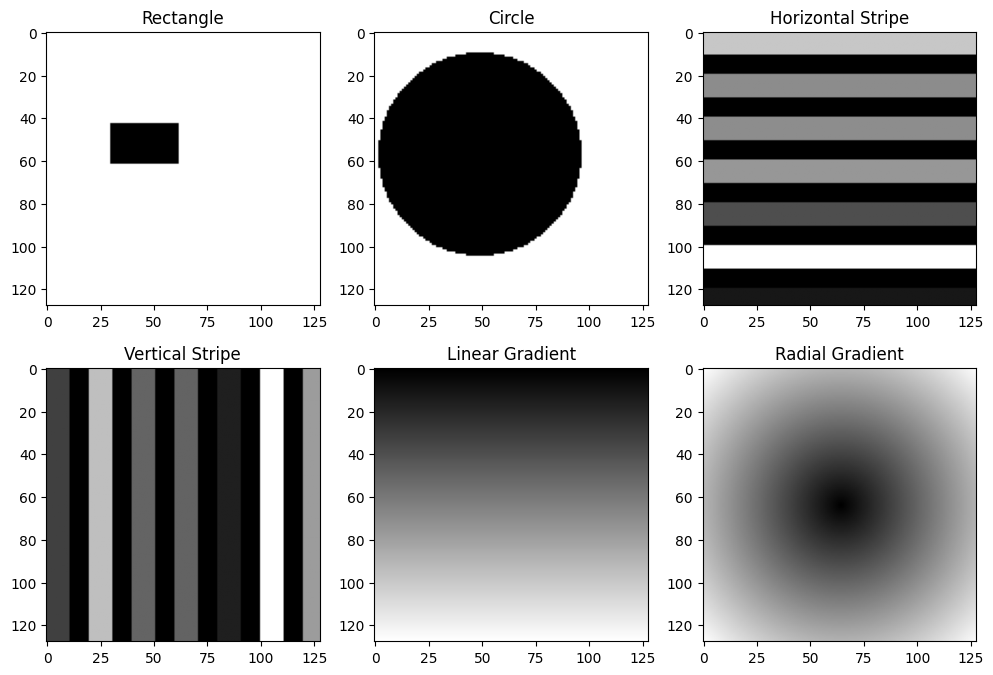

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

axs[0][0].imshow(Image.open('/content/dataset/rectangle_0.png'), cmap="gray")
axs[0][0].set_title('Rectangle')

axs[0][1].imshow(Image.open('/content/dataset/circle_0.png'), cmap="gray")
axs[0][1].set_title('Circle')

axs[0][2].imshow(Image.open('/content/dataset/horizontal_stripe_0.png'), cmap="gray")
axs[0][2].set_title('Horizontal Stripe')

axs[1][0].imshow(Image.open('/content/dataset/vertical_stripe_0.png'), cmap="gray")
axs[1][0].set_title('Vertical Stripe')

axs[1][1].imshow(Image.open('/content/dataset/linear_gradient_0.png'), cmap="gray")
axs[1][1].set_title('Linear Gradient')

axs[1][2].imshow(Image.open('/content/dataset/radiant_gradient_0.png'), cmap="gray")
axs[1][2].set_title('Radial Gradient')

plt.show()

In [ ]:
!zip -r /content/dataset.zip /content/dataset
from google.colab import files
files.download('/content/dataset.zip')

Выходные данные были обрезаны до нескольких последних строк (5000).
updating: content/dataset/radiant_gradient_19.png (stored 0%)
updating: content/dataset/vertical_stripe_823.png (deflated 33%)
updating: content/dataset/horizontal_stripe_422.png (deflated 6%)
updating: content/dataset/radiant_gradient_628.png (stored 0%)
updating: content/dataset/circle_325.png (deflated 4%)
updating: content/dataset/linear_gradient_107.png (deflated 42%)
updating: content/dataset/rectangle_292.png (deflated 32%)
updating: content/dataset/circle_609.png (deflated 2%)
updating: content/dataset/circle_866.png (deflated 10%)
updating: content/dataset/horizontal_stripe_150.png (deflated 7%)
updating: content/dataset/radiant_gradient_122.png (stored 0%)
updating: content/dataset/rectangle_935.png (deflated 31%)
updating: content/dataset/radiant_gradient_408.png (stored 0%)
updating: content/dataset/vertical_stripe_109.png (deflated 33%)
updating: content/dataset/horizontal_stripe_579.png (deflated 6%)
upda

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
from PIL import Image

original_folder_path = '/content/drive/MyDrive/диплом/img/lines_highQuality/dataset/'
output_folder_path = '/content/drive/MyDrive/диплом/img/lines_lowQuality/'

os.makedirs(output_folder_path, exist_ok=True)

for filename in os.listdir(original_folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        print("Обрабатываем:", filename)  # Проверка
        img_path = os.path.join(original_folder_path, filename)
        try:
            img = Image.open(img_path)
        except Exception as e:
            print(f"Ошибка при открытии {filename}: {e}")
            continue

        small_size = (img.width // 2, img.height // 2)
        low_quality_img = img.resize(small_size, Image.BICUBIC)
        low_quality_img = low_quality_img.resize(img.size, Image.BICUBIC)

        save_path = os.path.join(output_folder_path, filename)
        try:
            if filename.lower().endswith(('.jpg', '.jpeg')):
                low_quality_img.save(save_path, quality=30)
            else:
                low_quality_img.save(save_path)
        except Exception as e:
            print(f"Ошибка при сохранении {filename}: {e}")

print("Ухудшение изображений завершено.")

Выходные данные были обрезаны до нескольких последних строк (5000).
Обрабатываем: horizontal_stripe_137.png
Обрабатываем: horizontal_stripe_12.png
Обрабатываем: horizontal_stripe_138.png
Обрабатываем: horizontal_stripe_121.png
Обрабатываем: horizontal_stripe_16.png
Обрабатываем: horizontal_stripe_162.png
Обрабатываем: horizontal_stripe_108.png
Обрабатываем: horizontal_stripe_113.png
Обрабатываем: horizontal_stripe_11.png
Обрабатываем: horizontal_stripe_109.png
Обрабатываем: horizontal_stripe_110.png
Обрабатываем: horizontal_stripe_105.png
Обрабатываем: horizontal_stripe_106.png
Обрабатываем: horizontal_stripe_123.png
Обрабатываем: horizontal_stripe_119.png
Обрабатываем: horizontal_stripe_117.png
Обрабатываем: horizontal_stripe_104.png
Обрабатываем: horizontal_stripe_103.png
Обрабатываем: horizontal_stripe_115.png
Обрабатываем: horizontal_stripe_114.png
Обрабатываем: horizontal_stripe_112.png
Обрабатываем: horizontal_stripe_116.png
Обрабатываем: horizontal_stripe_111.png
Обрабатываем: h

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

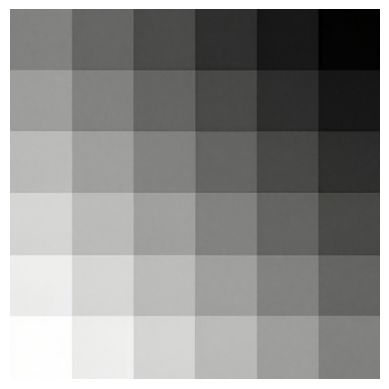

In [ ]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from diffusers import StableDiffusionUpscalePipeline

input_path = "/content/drive/MyDrive/диплом/img/градиент нач.jpg"
output_path = "/content/drive/MyDrive/диплом/img/градиент_высокое.jpg"

pipe = StableDiffusionUpscalePipeline.from_pretrained(
    "stabilityai/stable-diffusion-x4-upscaler",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

low_res_img = Image.open(input_path).convert("RGB")
low_res_img = low_res_img.resize((128, 128))

result = pipe(prompt="high quality plant leaf", image=low_res_img)
upscaled_image = result.images[0]

upscaled_image.save(output_path)

plt.imshow(upscaled_image)
plt.axis('off')
plt.show()

Correlation = 0.5013004345496108
Chi-Squared = 21.02173895547513
Intersection = 0.4533042907714844
Bhattacharyya = 0.47255142514113924


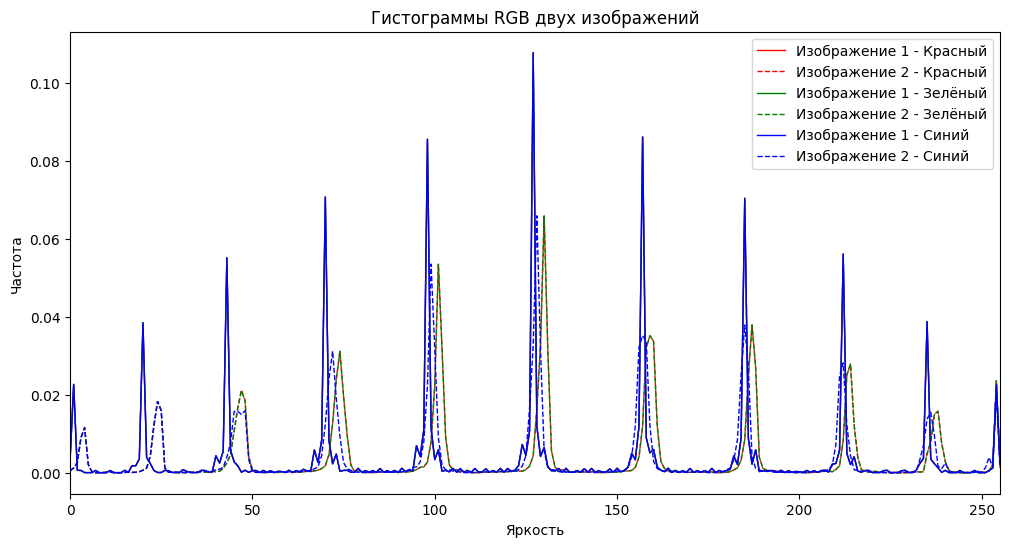

In [ ]:
import numpy as np

img_path1 = "/content/drive/MyDrive/диплом/img/ориг.jpg"
img_path2 = "/content/drive/MyDrive/диплом/img/градиент_высокое.jpg"

img1 = cv2.imread(img_path1)
img2 = cv2.imread(img_path2)

if img1 is None or img2 is None:
    print("Ошибка при чтении изображений")
    exit()

colors = ('r', 'g', 'b')
channel_ids = [2, 1, 0]
labels = ['Красный', 'Зелёный', 'Синий']

plt.figure(figsize=(12, 6))
plt.title("Гистограммы RGB двух изображений")
for i, col, label in zip(channel_ids, colors, labels):
    hist1 = cv2.calcHist([img1], [i], None, [256], [0, 256])
    hist1 = hist1 / hist1.sum()
    plt.plot(hist1, color=col, linestyle='-', linewidth=1, label=f'Изображение 1 - {label}')

    hist2 = cv2.calcHist([img2], [i], None, [256], [0, 256])
    hist2 = hist2 / hist2.sum()
    plt.plot(hist2, color=col, linestyle='--', linewidth=1, label=f'Изображение 2 - {label}')

methods = {
    'Correlation': cv2.HISTCMP_CORREL,
    'Chi-Squared': cv2.HISTCMP_CHISQR,
    'Intersection': cv2.HISTCMP_INTERSECT,
    'Bhattacharyya': cv2.HISTCMP_BHATTACHARYYA
}

for name, method in methods.items():
    score = cv2.compareHist(hist1, hist2, method)
    print(f"{name} = {score}")

plt.xlim([0, 255])
plt.xlabel('Яркость')
plt.ylabel('Частота')
plt.legend()
plt.show()

In [ ]:
import cv2
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity

img_path1 = "/content/drive/MyDrive/диплом/img/ориг.jpg"
img_path2 = "/content/drive/MyDrive/диплом/img/градиент_высокое.jpg"

img1 = cv2.imread(img_path1)
img2 = cv2.imread(img_path2)

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

mse_value = mean_squared_error(img1_rgb, img2_rgb)

psnr_value = peak_signal_noise_ratio(img1_rgb, img2_rgb, data_range=255)

ssim_value, ssim_image = structural_similarity(
    img1_rgb, img2_rgb, full=True, data_range=255, channel_axis=2
)

print(f"MSE: {mse_value}")
print(f"PSNR: {psnr_value}")
print(f"SSIM: {ssim_value}")

MSE: 16.66628138224284
PSNR: 35.91241650981553
SSIM: 0.9440643269990594
